# Thera Bank Personal Loan Campaign



Attribute Information:
* ID: CustomerID
* Age: Customer's age in completedyears
* Experience: #years of professionalexperience
* ZIPCode: Home Address ZIPcode.
* Family:Family size of the customer
* CCAvg:Avg. spending on credit cards per month($000)
* Education:Education Level. 
      1: Undergrad; 
      2: Graduate;
      3:  Advanced/Professional


* Mortgage: Value of house mortgage if any.($000)
* PersonalLoan:Did this customer accept the personal loan offered in the last campaign? 
* SecuritiesAccount:Does the customer have a securities account with the bank? 
* CDAccount:Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Does the customer use internet bankin facilities?
* Creditcard: Does the customer use a creditcard issued by the bank?











#1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np
from scipy import stats

# calculate accuracy measures and confusion matrix
from sklearn import metrics

In [ ]:
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
#Shape

df.shape

(5000, 14)

In [ ]:
#Checking Data Type

df.info()

# Note: The info indicates that there are no null values in any of the columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [ ]:
# Checking for null
df.isnull().values.any()

# There are no nulls. But from description above it seems that certain experience values are in negative

z = df[df['Experience'] < 0]

for i in list(z[z['Experience'] < 0].index):
  df.loc[i, 'Experience'] = 0



#EDA: Study the data distribution in each attribute and target variable, share your findings

* Number of unique in each column?

In [ ]:
# Number of unique value in each column
df.nunique()



ID                    5000
Age                     45
Experience              44
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

* Number of people with zero mortgage?

In [ ]:
df[df['Mortgage'] == 0]['Mortgage'].count()

3462

* Number of people with zero credit card spending per month?

In [ ]:
df[df['CCAvg'] == 0]['CCAvg'].count()

106

* Value counts of all categorical columns.

In [ ]:
 # checking value counts of all Categorical columns
for i in ['Education','Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']:  
   print(df[i].value_counts(normalize=True))
   print()
    

1    0.4192
3    0.3002
2    0.2806
Name: Education, dtype: float64

0    0.904
1    0.096
Name: Personal Loan, dtype: float64

0    0.8956
1    0.1044
Name: Securities Account, dtype: float64

0    0.9396
1    0.0604
Name: CD Account, dtype: float64

1    0.5968
0    0.4032
Name: Online, dtype: float64

0    0.706
1    0.294
Name: CreditCard, dtype: float64



* Univariate

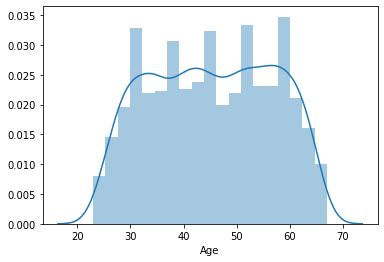

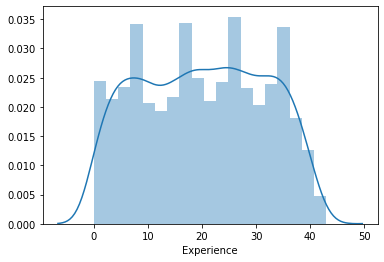

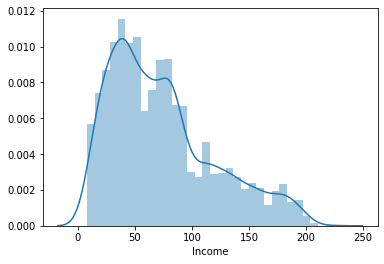

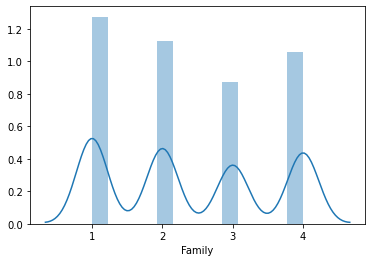

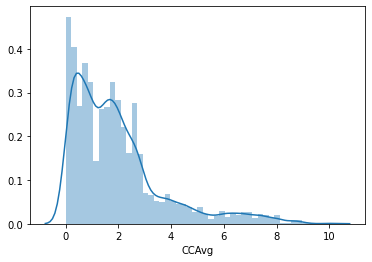

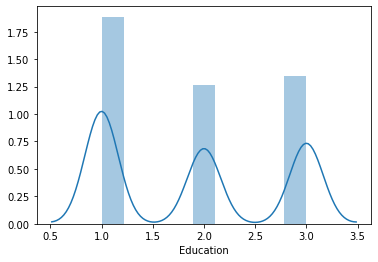

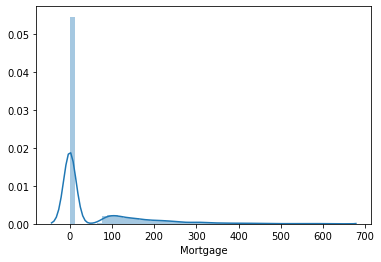

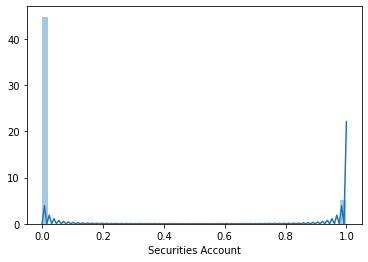

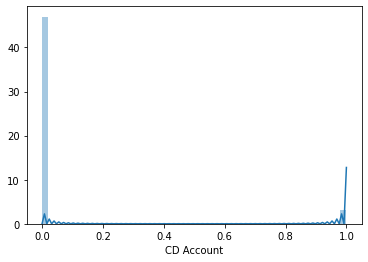

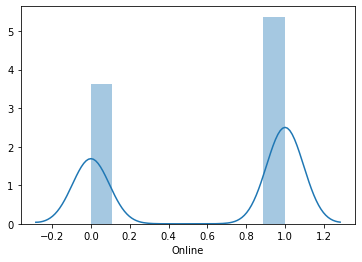

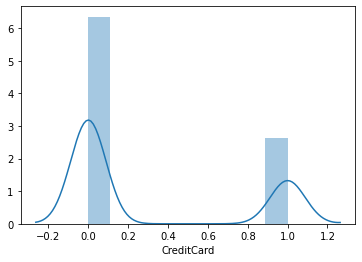

In [ ]:
# Univariate Analysis

for i in ['Age','Experience', 'Income', 'Family', 'CCAvg', 'Education',	'Mortgage',	'Securities Account',	'CD Account',	'Online',	'CreditCard']:
    sns.distplot(df[i])
    plt.show()

 * Bi-variate Analysis

In [ ]:
## Let us look at the target column which is 'Personal Loan' to understand how the data is distributed amongst the various values

df.groupby(['Personal Loan'])['Age','Experience', 'Income', 'Family','CCAvg','Mortgage'].mean()


,Age,Experience,Income,Family,CCAvg,Mortgage
Personal Loan,,,,,,
0,45.367257,20.148894,66.237389,2.373451,1.729009,51.789381
1,45.066667,19.843750,144.745833,2.612500,3.905354,100.845833


In [ ]:
df.groupby(['Personal Loan'])['Age','Experience', 'Income', 'Family','CCAvg','Mortgage'].median()

,Age,Experience,Income,Family,CCAvg,Mortgage
Personal Loan,,,,,,
0,45.0,20.0,59.0,2.0,1.4,0.0
1,45.0,20.0,142.5,3.0,3.8,0.0


* Insights:

The people with high income, family size and little more credit card spending has a chance of responding to the Personal Loan campaign.

In [ ]:
pd.crosstab(df['Education'],df['Personal Loan'],normalize='index')

Personal Loan,0,1
Education,,
1,0.955630,0.044370
2,0.870278,0.129722
3,0.863424,0.136576


In [ ]:
pd.crosstab(df['Securities Account'],df['Personal Loan'],normalize='index')

Personal Loan,0,1
Securities Account,,
0,0.906208,0.093792
1,0.885057,0.114943


In [ ]:
pd.crosstab(df['CD Account'],df['Personal Loan'],normalize='index')

Personal Loan,0,1
CD Account,,
0,0.927629,0.072371
1,0.536424,0.463576


In [ ]:
pd.crosstab(df['Online'],df['Personal Loan'],normalize='index')

Personal Loan,0,1
Online,,
0,0.90625,0.09375
1,0.90248,0.09752


* Insights:

No difference due to Online status. Therefore dropping this column

In [ ]:
pd.crosstab(df['CreditCard'],df['Personal Loan'],normalize='index')

Personal Loan,0,1
CreditCard,,
0,0.904533,0.095467
1,0.902721,0.097279


* Insights:

No difference due to CreditCard. Therefore dropping this column

* Get data model ready

In [ ]:
df.drop(['Age','Experience','CreditCard','Online','ID','ZIP Code'],axis=1,inplace=True)



## Split the data into training and test set in the ratio of 70:30 respectively

In [ ]:
X = df.drop('Personal Loan', axis=1)
Y = df[['Personal Loan']]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=7)

* Checking for True/False ratio in Training and Test Data

In [ ]:

print('Percentage of True in Training', y_train.sum()*100/len(y_train))
print('Percentage of True in Training', y_test.sum()*100/len(y_test))


Percentage of True in Training Personal Loan    9.771429
dtype: float64
Percentage of True in Training Personal Loan    9.2
dtype: float64


## Use Logistic Regression model to predict whether the customer will take personal loan or not. Print all the metrics related for evaluating the model performance

In [ ]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=7)
logreg.fit(X_train, y_train)   

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_predict = logreg.predict(X_test)

In [ ]:
# Observe the predicted and observed classes in a dataframe.

z = X_test.copy()
z['Observed Personal Loan'] = y_test
z['Predicted Personal Loan'] = y_predict
z.head()

,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Observed Personal Loan,Predicted Personal Loan
3406,34,3,2.0,3,0,0,0,0,0
757,81,3,1.8,2,0,1,0,0,0
3624,70,1,1.4,3,0,0,0,0,0
4544,80,3,2.5,1,0,0,0,0,0
3235,39,2,1.6,3,0,0,0,0,0


In [ ]:
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Trainig accuracy 0.9431428571428572

Testing accuracy 0.9546666666666667

Confusion Matrix


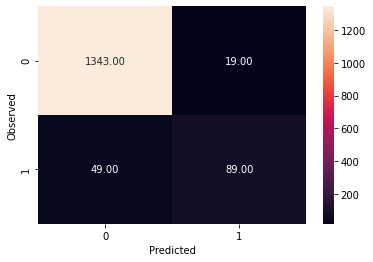

None

Recall: 0.644927536231884

Precision: 0.8240740740740741

F1 Score: 0.7235772357723578

Roc Auc Score: 0.8154887314052225


In [ ]:
print("Trainig accuracy",logreg.score(X_train,y_train))  
print()
print("Testing accuracy",logreg.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

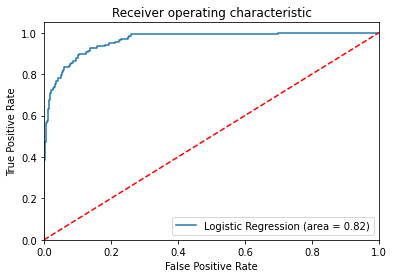

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Check different parameters of Logistic Regression and give your reasoning whether the model performance is affected due to it or not?

In [ ]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 7,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# Running a loop to check different values of 'solver'

train_score=[]
test_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l2', C = 0.75,solver=i)  # changing values of solver
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.943, 0.944, 0.945, 0.902, 0.902]

[0.953, 0.956, 0.953, 0.908, 0.908]


In [ ]:
train_score=[]
test_score=[]
solver = ['liblinear','saga']   # changing values of solver which works with 'l1'
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l1', C = 0.75,solver=i)  #changed penalty to 'l1'
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['liblinear', 'saga']

[0.944, 0.902]

[0.952, 0.908]


**Insights:**
- `Highest accuracy is same 'l1' with 'liblinear' and 'l2' with 'newton-cg'`

choose any one

In [ ]:
model = LogisticRegression(random_state=42,penalty='l1',solver='liblinear',class_weight='balanced') # changing class weight to balanced

model.fit(X_train, y_train) 

y_predict = model.predict(X_test)     

print("Trainig accuracy",model.score(X_train,y_train))  
print()
print("Testing accuracy",model.score(X_test, y_test))

Trainig accuracy 0.8934285714285715

Testing accuracy 0.8913333333333333


In [ ]:
# Running a loop to check different values of 'C'

train_score=[]                                 
test_score=[]
C = [0.01,0.1,0.25,0.5,0.75,1]
for i in C:
    model = LogisticRegression(random_state=42,penalty='l1', solver='liblinear',class_weight='balanced', C=i)  # changing values of C
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train,y_train),3)) # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(model.score(X_test, y_test),3))   # appending testing accuracy in a blank list for every run of the loop
    
print(C)
print()
print(train_score)
print()
print(test_score)

[0.01, 0.1, 0.25, 0.5, 0.75, 1]

[0.837, 0.89, 0.893, 0.894, 0.893, 0.893]

[0.849, 0.895, 0.891, 0.893, 0.892, 0.891]


* We will use C = 1, as it gives the best testing accuracy

Trainig accuracy 0.8931428571428571

Testing accuracy 0.8906666666666667

Confusion Matrix


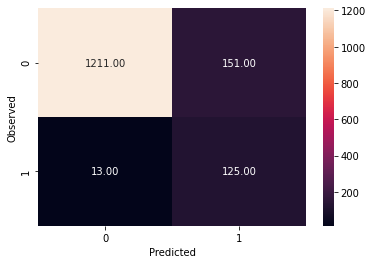

None

Recall: 0.9057971014492754

Precision: 0.4528985507246377

F1 Score: 0.6038647342995169

Roc Auc Score: 0.8974653642341825


In [ ]:
#Therefore final model is
model = LogisticRegression(random_state=42,penalty='l2', solver='newton-cg', class_weight='balanced',C=0.75) 
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print("Trainig accuracy",model.score(X_train,y_train))  
print()
print("Testing accuracy",model.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

#6. Give Business understanding of your model.

The model has a high Recall Value of 90% and 45% precision. 

* This behavior is understandable because the dataset is imbalanced over the Target variable 'Personal Loan'. There are 480 records which has an Outcome 1 for this variable while 4520 records have an Outcome of 0.


* For such a case usually Recall value is a True measure of the effectiveness of the model. A very high value of recalls indicates a very low of False Negative. That means that a very low number of Cutomers who were thought to be not responding actually responded. For a campaign with such a low response, missing out of potential customers who were actually intersted might have caused Very High Oppourtunity Cost.

* On the other hand it doesn't harm to have high False Negatives. In this problem the False negatives are actually more than False positives. But if we look at the percentage of total Customers who were not interested, the model only found 10% interested. So if they try to outreach them it wont be that watage of resources.


* Finally the ROC AUC Score is at 90% which shows that a very true high true positive rate for false positive rate.



